# 🎓 Week 11 - Day 2: Object Detection with YOLO

## Today's Goals:
✅ Understand object detection vs classification  
✅ Learn how YOLO works (high-level)  
✅ Use Ultralytics YOLO library  
✅ Detect objects in images and videos  

---

## 📦 Part 1: Setup & Installation

Let's install Ultralytics YOLO and get started!

In [1]:
# Install Ultralytics YOLO
!pip install ultralytics -q

print("✅ Ultralytics installed!")

✅ Ultralytics installed!


In [2]:
# Import libraries
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import requests
from io import BytesIO
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported!")
print("✅ Ready to detect objects!")

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Zigron\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Libraries imported!
✅ Ready to detect objects!


In [3]:
# Load pre-trained YOLOv8 model (nano version - fastest)
print("📥 Loading YOLOv8n (nano) model...")
model = YOLO('yolov8n.pt')  # Downloads automatically

print("✅ YOLOv8n loaded successfully!")
print("\n📊 Model Info:")
print(f"   • Pre-trained on COCO dataset")
print(f"   • Can detect 80 different object classes")
print(f"   • Classes include: person, car, dog, bicycle, etc.")

📥 Loading YOLOv8n (nano) model...
✅ YOLOv8n loaded successfully!

📊 Model Info:
   • Pre-trained on COCO dataset
   • Can detect 80 different object classes
   • Classes include: person, car, dog, bicycle, etc.


### 💡 What Just Happened?

✅ **Installed Ultralytics** - super easy YOLO library  
✅ **Loaded YOLOv8n** - nano version (fast & lightweight)  
✅ **Pre-trained on COCO** - 80 object classes ready to use  

**COCO Classes include:** person, bicycle, car, motorcycle, airplane, bus, train, truck, boat, traffic light, fire hydrant, stop sign, parking meter, bench, bird, cat, dog, horse, sheep, cow, elephant, bear, zebra, giraffe, backpack, umbrella, handbag, tie, suitcase, and 50+ more!

---

## 🖼️ Part 2: Image Detection

Let's detect objects in a single image!

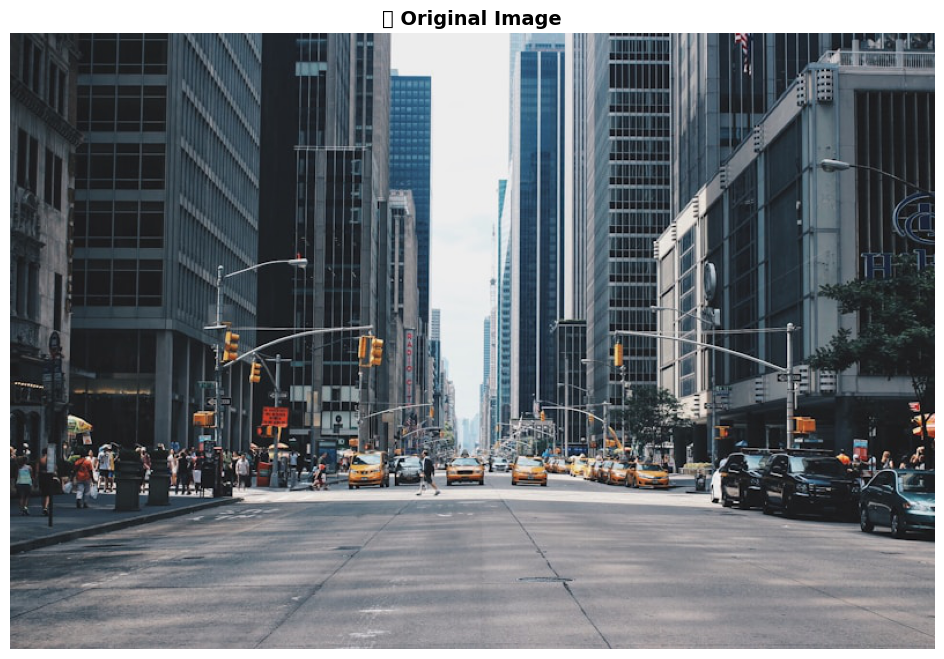

✅ Image size: (800, 533)


In [4]:
# Download sample image (street scene)
url = "https://images.unsplash.com/photo-1449824913935-59a10b8d2000?w=800"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Display original image
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.title('📸 Original Image', fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

print(f"✅ Image size: {img.size}")

In [5]:
# Run YOLO detection (just 1 line!)
print("🔍 Running YOLO detection...")
results = model(img)

print("✅ Detection complete!")
print(f"\n📊 Found {len(results[0].boxes)} objects")

🔍 Running YOLO detection...

0: 448x640 9 persons, 10 cars, 5 traffic lights, 201.8ms
Speed: 60.8ms preprocess, 201.8ms inference, 23.5ms postprocess per image at shape (1, 3, 448, 640)
✅ Detection complete!

📊 Found 24 objects


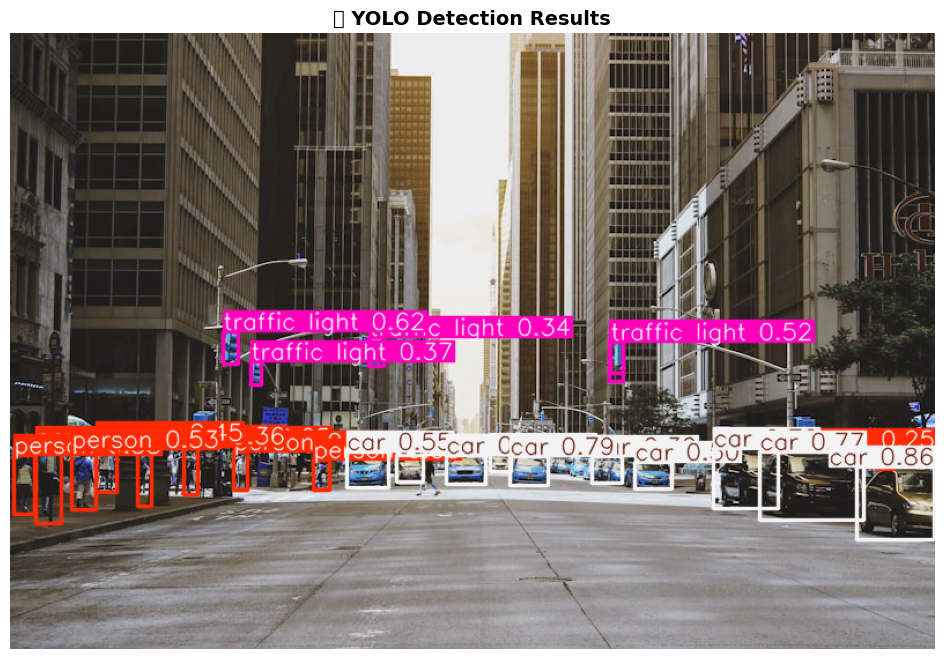

✅ Objects detected and visualized!


In [6]:
# Visualize results
result_img = results[0].plot()  # Draw bounding boxes

plt.figure(figsize=(12, 8))
plt.imshow(result_img)
plt.title('🎯 YOLO Detection Results', fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

print("✅ Objects detected and visualized!")

In [7]:
# Print detection details
print("📋 Detection Details:\n")

boxes = results[0].boxes
for i, box in enumerate(boxes):
    # Get box coordinates
    x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
    
    # Get confidence and class
    conf = box.conf[0].item()
    cls = int(box.cls[0].item())
    class_name = model.names[cls]
    
    print(f"Object {i+1}:")
    print(f"   Class: {class_name}")
    print(f"   Confidence: {conf:.2f}")
    print(f"   Box: ({x1:.0f}, {y1:.0f}) to ({x2:.0f}, {y2:.0f})")
    print()

📋 Detection Details:

Object 1:
   Class: car
   Confidence: 0.86
   Box: (733, 376) to (800, 438)

Object 2:
   Class: car
   Confidence: 0.79
   Box: (433, 366) to (466, 391)

Object 3:
   Class: car
   Confidence: 0.77
   Box: (648, 362) to (739, 421)

Object 4:
   Class: car
   Confidence: 0.72
   Box: (608, 360) to (665, 412)

Object 5:
   Class: car
   Confidence: 0.68
   Box: (377, 366) to (411, 391)

Object 6:
   Class: traffic light
   Confidence: 0.62
   Box: (184, 259) to (198, 287)

Object 7:
   Class: car
   Confidence: 0.55
   Box: (292, 363) to (328, 394)

Object 8:
   Class: person
   Confidence: 0.53
   Box: (53, 361) to (74, 412)

Object 9:
   Class: traffic light
   Confidence: 0.52
   Box: (520, 268) to (531, 294)

Object 10:
   Class: car
   Confidence: 0.50
   Box: (540, 371) to (573, 394)

Object 11:
   Class: car
   Confidence: 0.49
   Box: (416, 365) to (434, 379)

Object 12:
   Class: person
   Confidence: 0.45
   Box: (75, 355) to (93, 397)

Object 13:
   Cla

### 💡 Detection Insights:

✅ **Bounding boxes** - rectangles around each object  
✅ **Class labels** - what each object is  
✅ **Confidence scores** - how sure the model is (0.0 to 1.0)  
✅ **Coordinates** - (x1, y1) = top-left, (x2, y2) = bottom-right  

**Notice:** YOLO found all objects in a single pass! That's why it's called "You Only Look Once"!

---

## 🎬 Part 3: Batch Image Detection

Let's detect objects in multiple images at once!

In [8]:
# Download multiple sample images
image_urls = [
    "https://images.unsplash.com/photo-1544367567-0f2fcb009e0b?w=400",  # Dog
    "https://images.unsplash.com/photo-1568605114967-8130f3a36994?w=400",  # House
    "https://images.unsplash.com/photo-1449824913935-59a10b8d2000?w=400",  # City
]

print("📥 Downloading sample images...")
images = []
for i, url in enumerate(image_urls):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    images.append(img)
    print(f"   ✅ Image {i+1} downloaded")

print(f"\n✅ Total images: {len(images)}")

📥 Downloading sample images...
   ✅ Image 1 downloaded
   ✅ Image 2 downloaded
   ✅ Image 3 downloaded

✅ Total images: 3


In [9]:
# Run detection on all images (batch processing)
print("🔍 Running batch detection...")
results = model(images)

print("✅ Batch detection complete!")
print(f"\n📊 Processed {len(results)} images")

🔍 Running batch detection...

0: 640x640 1 person, 82.2ms
1: 640x640 (no detections), 82.2ms
2: 640x640 4 persons, 9 cars, 6 traffic lights, 82.2ms
Speed: 3.1ms preprocess, 82.2ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
✅ Batch detection complete!

📊 Processed 3 images


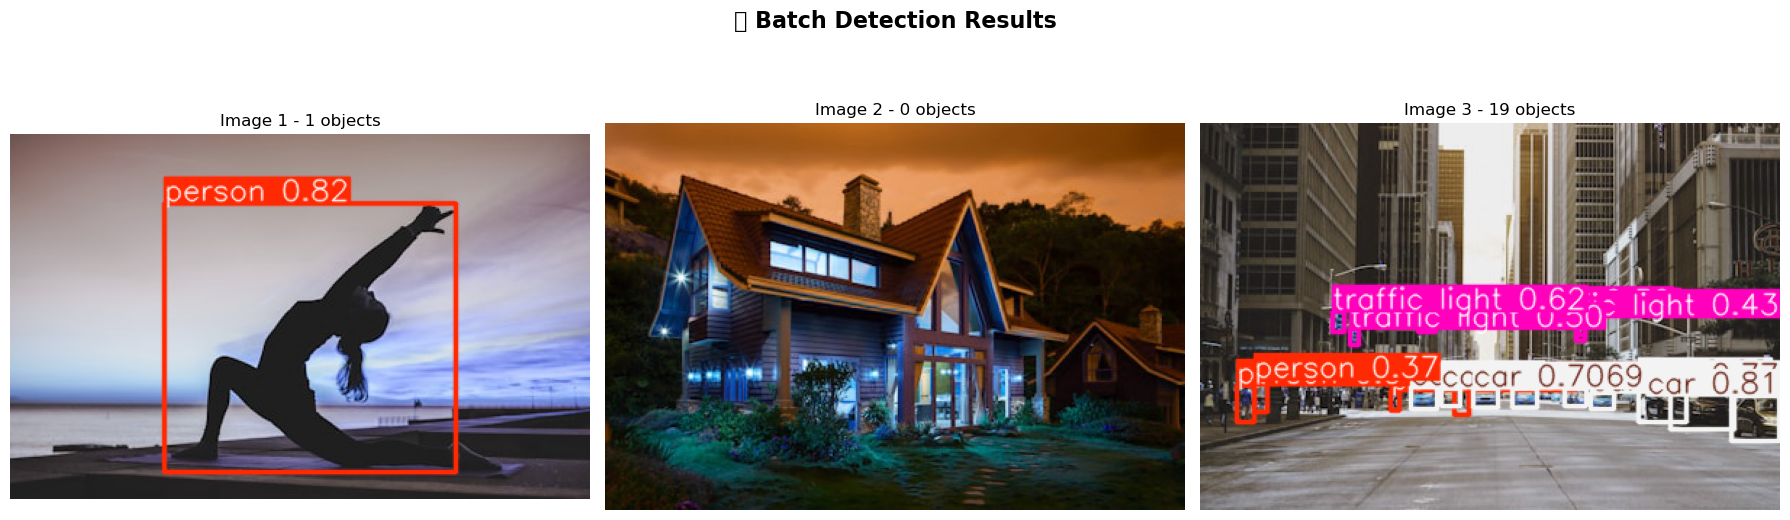

✅ All images processed and visualized!


In [10]:
# Visualize all results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('🎯 Batch Detection Results', fontsize=16, fontweight='bold')

for i, (result, ax) in enumerate(zip(results, axes)):
    result_img = result.plot()
    ax.imshow(result_img)
    ax.set_title(f'Image {i+1} - {len(result.boxes)} objects', fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

print("✅ All images processed and visualized!")

### 💡 Batch Processing Benefits:

✅ **Process multiple images efficiently**  
✅ **Same code works for 1 or 100 images**  
✅ **Automatic batching for speed**  
✅ **Perfect for production pipelines**  

---

## 🎥 Part 4: Confidence Threshold & Filtering

Let's control which detections we keep based on confidence!

In [11]:
# Download test image
url = "https://images.unsplash.com/photo-1541963463532-d68292c34b19?w=600"
response = requests.get(url)
test_img = Image.open(BytesIO(response.content))

print("✅ Test image loaded")

✅ Test image loaded



0: 640x448 1 person, 1 book, 93.9ms
Speed: 2.2ms preprocess, 93.9ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 1 person, 1 book, 129.2ms
Speed: 5.0ms preprocess, 129.2ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 1 book, 85.9ms
Speed: 3.3ms preprocess, 85.9ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 448)


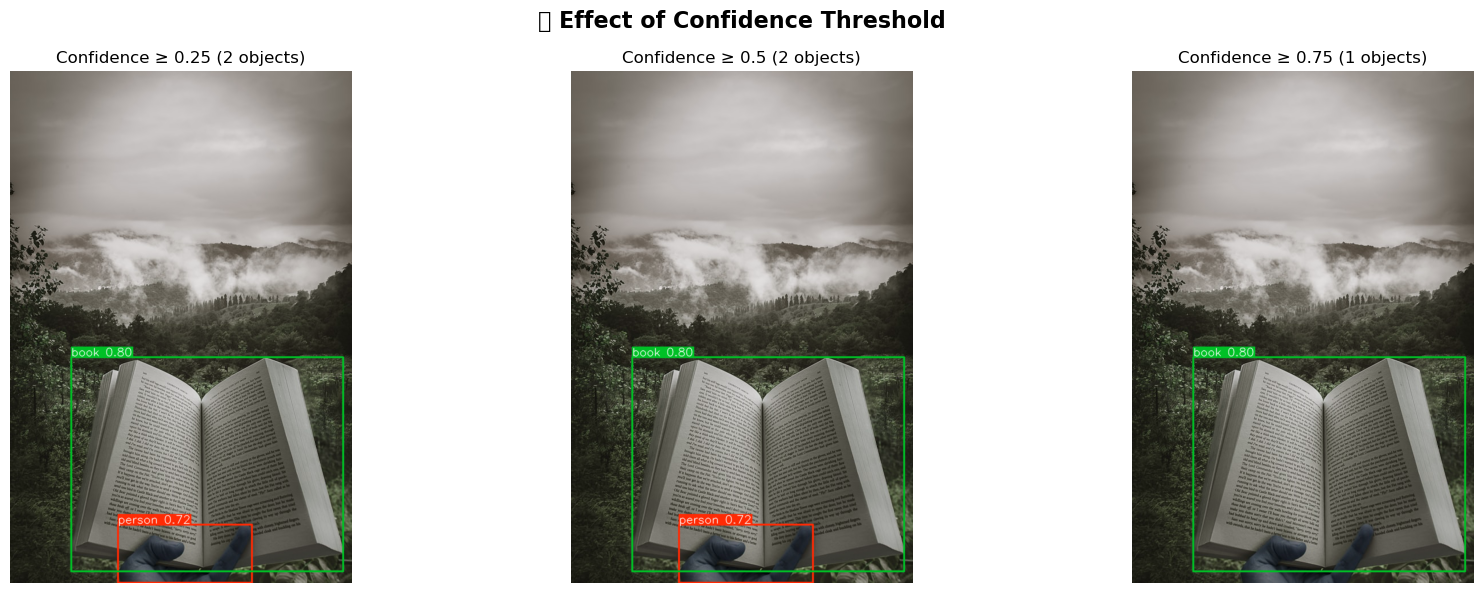


💡 Observation:
   • Lower threshold = More detections (but less confident)
   • Higher threshold = Fewer detections (but more confident)
   • Typical value: 0.5 (50% confidence)


In [12]:
# Try different confidence thresholds
thresholds = [0.25, 0.5, 0.75]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('🎯 Effect of Confidence Threshold', fontsize=16, fontweight='bold')

for i, (threshold, ax) in enumerate(zip(thresholds, axes)):
    # Run detection with specific confidence threshold
    results = model(test_img, conf=threshold)
    
    # Visualize
    result_img = results[0].plot()
    ax.imshow(result_img)
    ax.set_title(f'Confidence ≥ {threshold} ({len(results[0].boxes)} objects)', 
                 fontsize=12)
    ax.axis('off')

plt.tight_layout()
plt.show()

print("\n💡 Observation:")
print("   • Lower threshold = More detections (but less confident)")
print("   • Higher threshold = Fewer detections (but more confident)")
print("   • Typical value: 0.5 (50% confidence)")

In [13]:
# Filter by specific classes
print("🔍 Detecting only 'person' and 'car' classes...\n")

# Run detection
results = model(test_img)

# Filter results
boxes = results[0].boxes
filtered_detections = []

for box in boxes:
    cls = int(box.cls[0].item())
    class_name = model.names[cls]
    
    if class_name in ['person', 'car']:
        conf = box.conf[0].item()
        filtered_detections.append(f"{class_name} (conf: {conf:.2f})")

print(f"Found {len(filtered_detections)} person/car objects:")
for det in filtered_detections:
    print(f"   • {det}")

🔍 Detecting only 'person' and 'car' classes...


0: 640x448 1 person, 1 book, 191.3ms
Speed: 2.3ms preprocess, 191.3ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 448)
Found 1 person/car objects:
   • person (conf: 0.72)


### 💡 Confidence & Filtering:

✅ **Confidence threshold** - minimum score to keep detection  
✅ **Lower = more detections** (but noisier)  
✅ **Higher = fewer detections** (but more reliable)  
✅ **Class filtering** - focus on specific objects  

**Pro Tip:** Start with 0.5 confidence, adjust based on your needs!

---

## 🎯 Part 5: Mini Challenge

Now it's your turn to experiment!

### 🏆 Challenge Tasks:

**Your Mission:**
1. Find your own image online (or use a local image)
2. Run YOLO detection on it
3. Experiment with different confidence thresholds
4. Count how many of a specific object class you find (e.g., how many people?)

**Hints:**
```python
# Load your own image
my_image = Image.open('path/to/your/image.jpg')
# or from URL:
# url = 'your_image_url'
# response = requests.get(url)
# my_image = Image.open(BytesIO(response.content))

# Run detection with custom confidence
results = model(my_image, conf=0.4)

# Count specific class
count = 0
for box in results[0].boxes:
    cls = int(box.cls[0].item())
    if model.names[cls] == 'person':  # Change class name
        count += 1
print(f"Found {count} people")
```

**Expected Outcome:**
- Detect objects in your custom image
- Understand how confidence affects results
- Count specific objects

**Bonus Challenges:**
- Try YOLOv8s (small) or YOLOv8m (medium) for better accuracy: `YOLO('yolov8s.pt')`
- Save the result image with bounding boxes
- Find the object with highest confidence score

In [14]:
# Your code here!
# Try the challenges above



---

## 📚 Summary

### What We Learned:

**1. Object Detection Basics:**
- Detection = Classification + Localization
- Outputs: Bounding boxes + Classes + Confidence scores
- Multiple objects in single image
- Real-time capability (30+ FPS)

**2. YOLO Architecture:**
- You Only Look Once = Single-pass detection
- Divides image into grid
- Each cell predicts bounding boxes
- NMS removes duplicate boxes

**3. Ultralytics Implementation:**
- Super simple API (2-3 lines!)
- Pre-trained on COCO (80 classes)
- Works on images, videos, webcam
- Built-in visualization

**4. Practical Skills:**
- Load and use pre-trained YOLO
- Detect objects in images
- Batch processing
- Control confidence threshold
- Filter by object class

### 🎯 Key Takeaways:

✅ YOLO is super fast (real-time detection)  
✅ Ultralytics makes it incredibly easy  
✅ Confidence threshold controls detection sensitivity  
✅ Pre-trained models work amazingly well  
✅ YOLOv8n is fast, YOLOv8x is most accurate  

### 💡 Pro Tips:

- **Start with YOLOv8n** for speed, upgrade to v8s/m/l/x for accuracy
- **Use confidence=0.5** as default, adjust as needed
- **NMS is automatic** - you don't need to implement it
- **COCO classes** cover most common objects
- **Can fine-tune** on custom datasets (we'll cover later!)

### 📊 YOLO Model Comparison:

| Model | Speed | Accuracy | Use Case |
|-------|-------|----------|----------|
| YOLOv8n | ⚡⚡⚡ | ⭐⭐ | Real-time, resource-constrained |
| YOLOv8s | ⚡⚡ | ⭐⭐⭐ | Balanced |
| YOLOv8m | ⚡ | ⭐⭐⭐⭐ | Higher accuracy needed |
| YOLOv8l | ⚡ | ⭐⭐⭐⭐⭐ | Production quality |
| YOLOv8x | 🐢 | ⭐⭐⭐⭐⭐ | Maximum accuracy |

---

### 🚀 Next Steps:

Tomorrow we'll learn about **Semantic Segmentation with UNET** - pixel-level classification for even more detailed understanding!

**Great job completing Day 2! 🎉**